In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('DataTrain.csv')
test = pd.read_csv('DataTest.csv')
print("Complete")

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Complete


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (91) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
X_test = test[['YearGroup','NewPrice']]
y_test = test['Sold_Amount']

In [ ]:
#Cleanup of test 
index1 =train[pd.isnull(train.NewPrice)].index
new_train = train.drop(index=index1, axis=0)
index2 = new_train[pd.isnull(new_train.Sold_Amount)].index
new_new_train = new_train.drop(index=index2, axis=0)
print("complete")

In [17]:
train.columns[10:50]

Index(['LimitedEdition', 'Series', 'SeriesModelYear', 'BadgeDescription',
       'BadgeSecondaryDescription', 'BodyStyleDescription',
       'BodyConfigDescription', 'WheelBaseConfig', 'Roofline',
       'ExtraIdentification', 'DriveDescription', 'DriveCode',
       'GearTypeDescription', 'GearLocationDescription', 'GearNum', 'DoorNum',
       'EngineSize', 'EngineDescription', 'Cylinders', 'FuelTypeDescription',
       'InductionDescription', 'OptionCategory', 'CamDescription',
       'EngineTypeDescription', 'FuelCapacity', 'FuelDeliveryDescription',
       'MethodOfDeliveryDescription', 'GrossCombinationMAss',
       'GrossVehicleMass', 'VIN', 'WheelBase', 'Height', 'Length', 'Width',
       'KerbWeight', 'TareMass', 'PayLoad', 'Power', 'PowerRPMFrom',
       'PowerRPMTo'],
      dtype='object')

In [69]:
train.groupby(["GearNum"]).Sold_Amount.mean()
#train[pd.isnull(train.GearNum)]

GearNum
1.0    19006.486806
2.0     6000.000000
3.0     3465.771812
4.0    14308.765798
5.0    17418.681724
6.0    19611.979505
7.0    25051.029963
8.0    53134.328358
9.0    54100.000000
Name: Sold_Amount, dtype: float64

In [53]:
train.groupby(["EngineSize"]).Sold_Amount.mean()
train[pd.isnull(train.EngineSize)]

,Make,Model,MakeCode,FamilyCode,YearGroup,MonthGroup,SequenceNum,Description,CurrentRelease,ImportFlag,...,PrivateMax,NewPrice,Colour,Branch,SaleCategory,Sold_Date,Compliance_Date,Age_Comp_Months,KM,Sold_Amount


In [98]:
train.columns

Index(['Make', 'Model', 'MakeCode', 'FamilyCode', 'YearGroup', 'MonthGroup',
       'SequenceNum', 'Description', 'CurrentRelease', 'ImportFlag',
       ...
       'PrivateMax', 'NewPrice', 'Colour', 'Branch', 'SaleCategory',
       'Sold_Date', 'Compliance_Date', 'Age_Comp_Months', 'KM', 'Sold_Amount'],
      dtype='object', length=130)

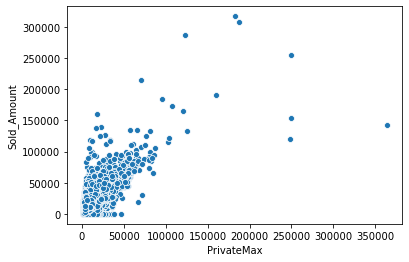

In [84]:
sns.scatterplot(x='PrivateMax',y='Sold_Amount',data=train)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029D9EC7F0A0>,
      dtype=object)

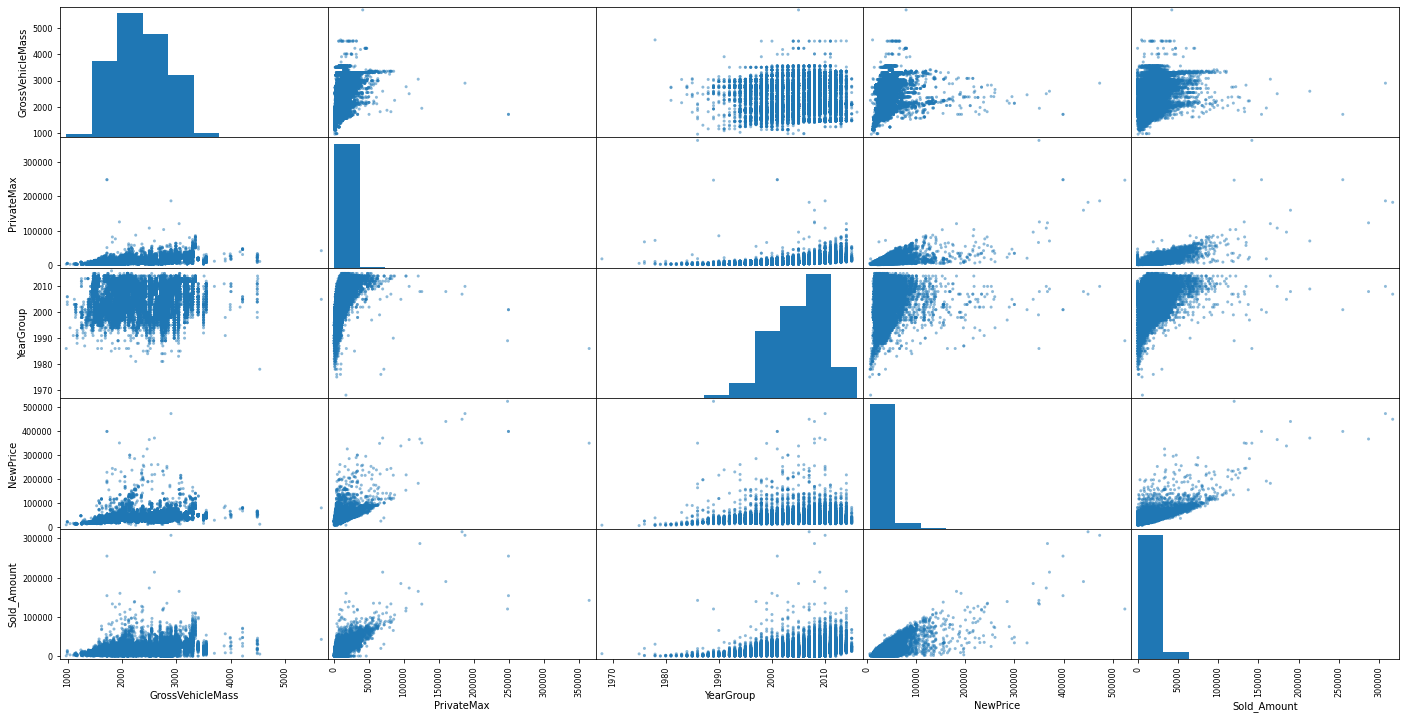

In [97]:
from pandas.plotting import scatter_matrix

features_matrix = ['GrossVehicleMass','PrivateMax','YearGroup','NewPrice','Sold_Amount']

scatter_matrix(train[features_matrix],figsize=(24,12))

In [38]:
plotting = train.groupby(["PrivateMax"]).Sold_Amount.mean()
#train[pd.isnull(train.FuelCapacity)]
#df = pd.DataFrame(data,columns=['Unemployment_Rate','Stock_Index_Price'])
plotting.columns=['PrivateMax','Sold_Amount']
print(plotting.columns)
print(type(plotting))
plotting.plot(x='PrivateMax', y='Sold_Amount', kind = 'scatter')
plt.show()

['PrivateMax', 'Sold_Amount']
<class 'pandas.core.series.Series'>


ValueError: plot kind scatter can only be used for data frames

In [70]:
#Cleanup on NAN values for train dataset
index1 =train[pd.isnull(train.NewPrice)].index
train1 = train.drop(index=index1, axis=0)
index2 = train1[pd.isnull(train1.Sold_Amount)].index
train2 = train1.drop(index=index2, axis=0)
index3 = train2[pd.isnull(train.GearNum)].index
train3 = train2.drop(index=index3, axis=0)
print("cleanup on Sold_Amount and NewPrice")

cleanup on Sold_Amount and NewPrice


<ipython-input-70-aed0e07aeb02>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index3 = train2[pd.isnull(train.GearNum)].index


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit_transform(new_new_train.NewPrice[Ellipsis, None])
X_train = train2[['PrivateMax','NewPrice']]
#X_train = new_new_train.NewPrice.reshape(1,-1)
y_train = train2.Sold_Amount

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
#print("Prediction of test set:{:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.254


In [65]:
new_new_train[['YearGroup','NewPrice']]


,YearGroup,NewPrice
0,2008,34790.0
1,1993,27978.0
2,2012,31990.0
3,2007,35990.0
4,2007,49490.0
...,...,...
50698,2011,39740.0
50699,2002,33570.0
50700,2009,26390.0
50701,2003,34660.0
